Part - 1:
===========

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('dataset.csv')
print(df.describe())

               f3      target
count  766.000000  766.000000
mean    69.118799    0.349869
std     19.376901    0.477240
min      0.000000    0.000000
25%     62.500000    0.000000
50%     72.000000    0.000000
75%     80.000000    1.000000
max    122.000000    1.000000


In [6]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in f1: ['6' '1' '8' '0' '5' '3' '10' '2' '4' '7' '9' '11' '13' '15' '17' '12'
 '14' 'c']
Unique values in f2: ['148' '85' '183' '89' '137' '116' '78' '115' '197' '125' '110' '168'
 '139' '189' '166' '100' '118' '107' '103' '126' '99' '196' '119' '143'
 '147' '97' '145' '117' '109' '158' '88' '92' '122' '138' '102' '90' '111'
 '180' '133' '106' '171' '159' '146' '71' '105' '101' '176' '150' '73'
 '187' '84' '44' '141' '114' '95' '129' '79' '0' '62' '131' '112' '113'
 '74' '83' '136' '80' '123' '81' '134' '142' '144' '93' '163' '151' '96'
 '155' '76' '160' '124' '162' '132' '120' '173' '170' '128' '108' '154'
 '57' '156' '153' '188' '152' '104' '87' '75' '179' '130' '194' '181'
 '135' '184' '140' '177' '164' '91' '165' '86' '193' '191' '161' '167'
 '77' '182' '157' '178' '61' '98' '127' '82' '72' '172' '94' '175' '195'
 '68' '186' '198' '121' '67' '174' '199' '56' '169' '149' '65' '190' 'f']
Unique values in f3: [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  

In [9]:
# we see that there are alphabets in numeric columns so we replace them with mean of that respective column
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].mean(), inplace=True)
df.tail

C:\Users\ruthv\AppData\Local\Temp\ipykernel_16316\399973658.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


<bound method NDFrame.tail of             f1     f2  f3         f4          f5        f6        f7  target
0     6.000000  148.0  72  35.000000    0.000000  33.60000  0.627000       1
1     1.000000   85.0  66  29.000000    0.000000  26.60000  0.351000       0
2     8.000000  183.0  64   0.000000    0.000000  23.30000  0.672000       1
3     1.000000   89.0  66  23.000000   94.000000  28.10000  0.167000       0
4     0.000000  137.0  40  35.000000  168.000000  43.10000  2.288000       1
..         ...    ...  ..        ...         ...       ...       ...     ...
761   9.000000   89.0  62   0.000000    0.000000  22.50000  0.472128       0
762  10.000000  101.0  76  48.000000  180.000000  31.99817  0.171000       0
763   2.000000  122.0  70  27.000000   80.091503  36.80000  0.340000       0
764   3.849673  121.0  72  23.000000  112.000000  26.20000  0.245000       0
765   1.000000  126.0  60  20.542484    0.000000  30.10000  0.349000       1

[766 rows x 8 columns]>

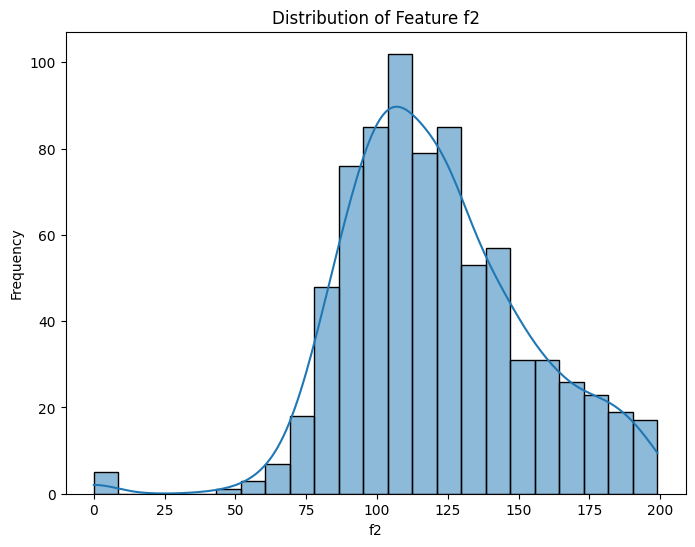

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['f2'], kde=True)
plt.title('Distribution of Feature f2')
plt.xlabel('f2')
plt.ylabel('Frequency')
plt.show()

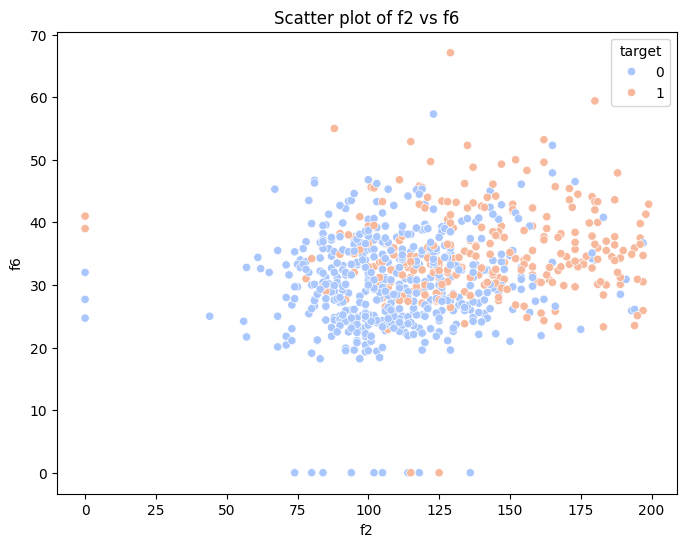

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='f2', y='f6', hue='target', palette='coolwarm')
plt.title('Scatter plot of f2 vs f6')
plt.xlabel('f2')
plt.ylabel('f6')
plt.show()

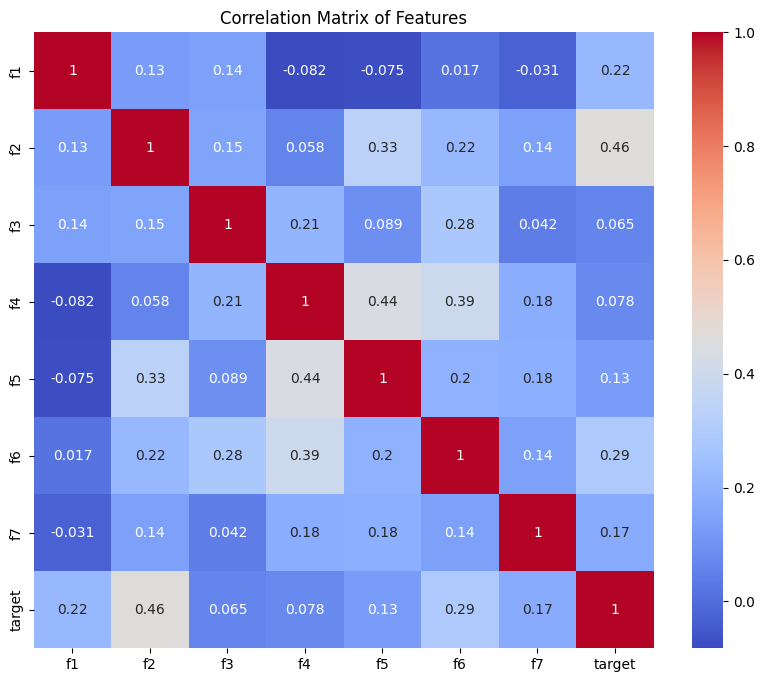

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()